<a href="https://colab.research.google.com/github/thamadhi/telco-customer-churn-CM2604/blob/main/Notebooks/EDA_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/thamadhi/telco-customer-churn-CM2604.git

Cloning into 'telco-customer-churn-CM2604'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 167.69 KiB | 5.24 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import missingno as msno
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

In [12]:
data = 'telco-customer-churn-CM2604/data/Telco-Customer-Churn-unprocessed.csv'
df = pd.read_csv(data)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#create statistics table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


<Axes: >

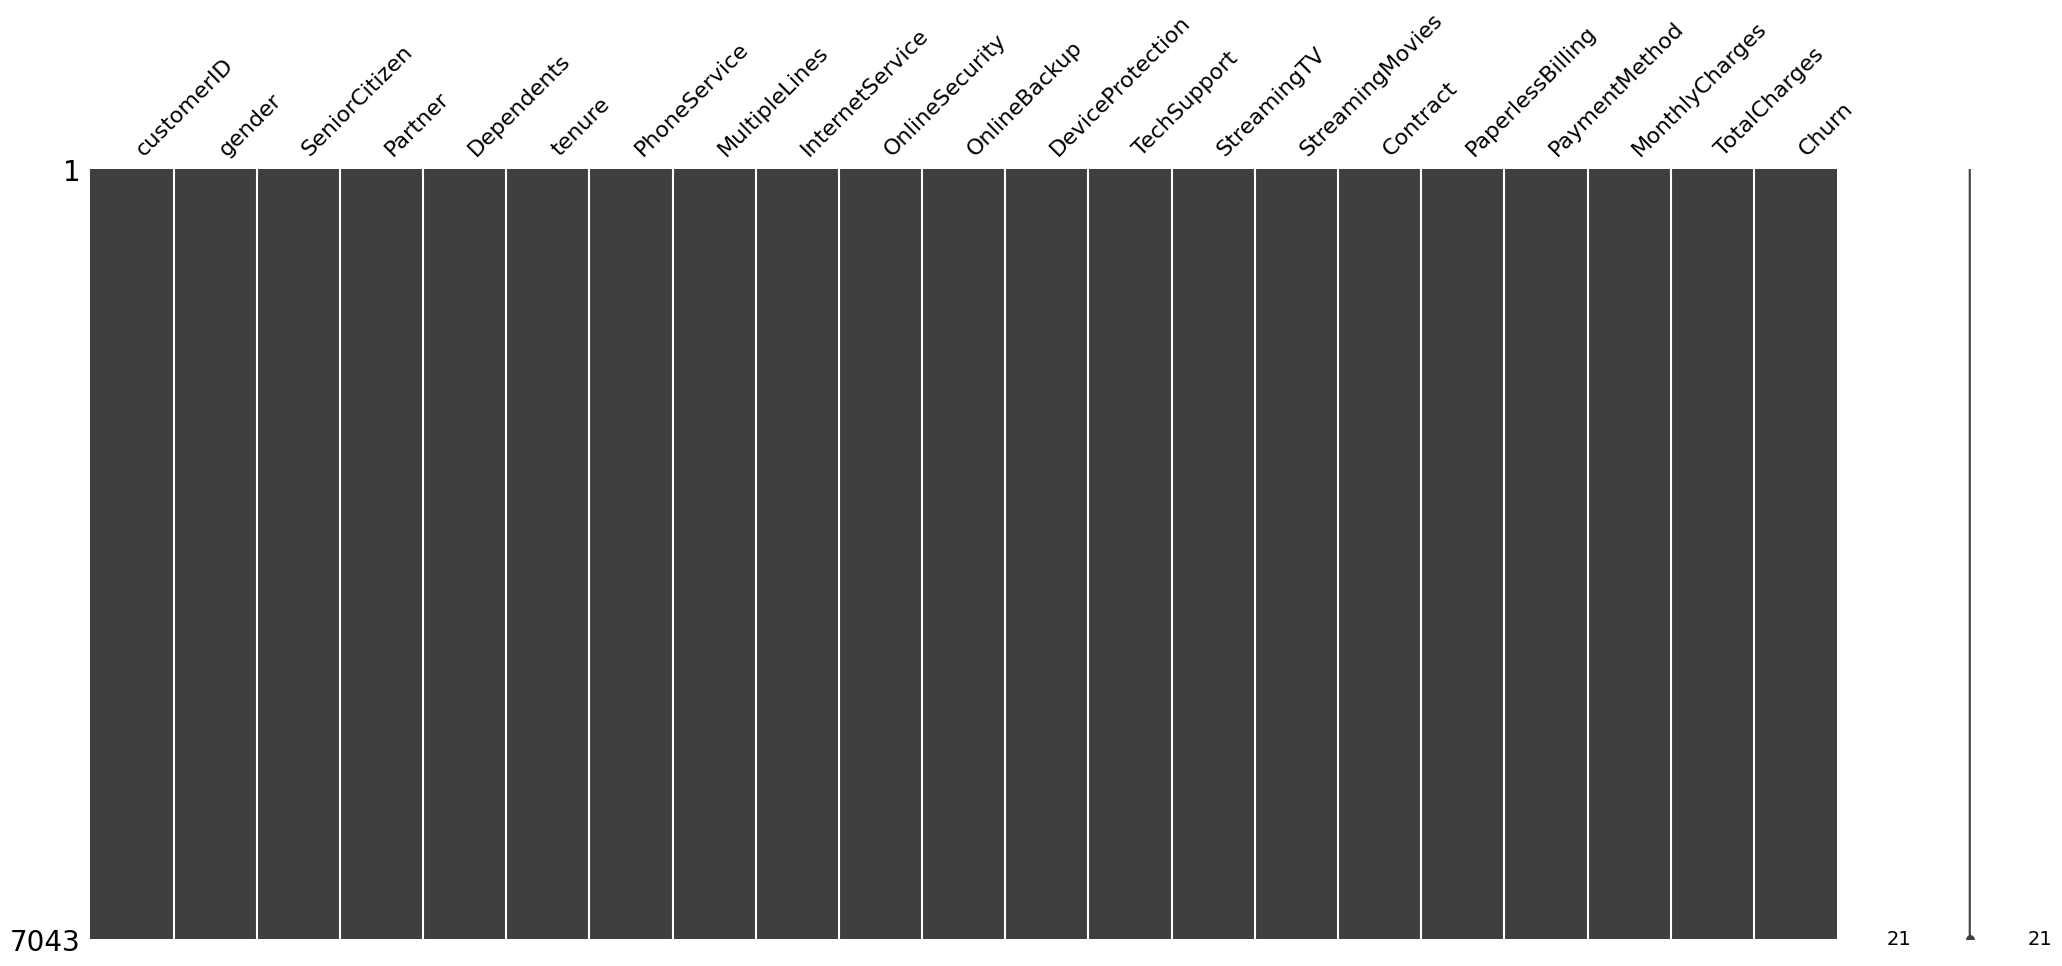

In [15]:
#using missingno library, plot the missing values in our dataframe
msno.matrix(df)

# Observation:
There are no missing values in our columns according to the missinigno plot

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1132,5293-WXJAK,Female,1,Yes,No,11,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.05,1133.65,Yes
1437,1666-JZPZT,Male,0,No,No,27,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,49.00,1291.35,No
3836,6872-HXFNF,Female,0,Yes,No,64,Yes,Yes,DSL,No,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),58.35,3756.45,No
6415,8224-UAXBZ,Female,0,Yes,No,58,No,No phone service,DSL,Yes,...,No,No,Yes,No,One year,Yes,Electronic check,45.35,2540.1,No
184,1918-ZBFQJ,Female,0,No,No,13,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,79.25,1111.65,Yes


In [23]:
#checking unique variables
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
df['SeniorCitizen'].unique()

array([0, 1])

In [21]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
#ensure no duplicate customer ids
len(df['customerID'].unique())

7043

In [54]:
def countplot_function(dataframe, column, figsize = (15,10), palette= 'viridis', distinct_colors=True, custom_colors=None):
  plt.figure(figsize =figsize)
  sns.countplot(x=dataframe[column], palette=palette)
  plt.title("{} countplot".format(column), fontsize=15)
  plt.xlabel("{}".format(column), fontsize =10)


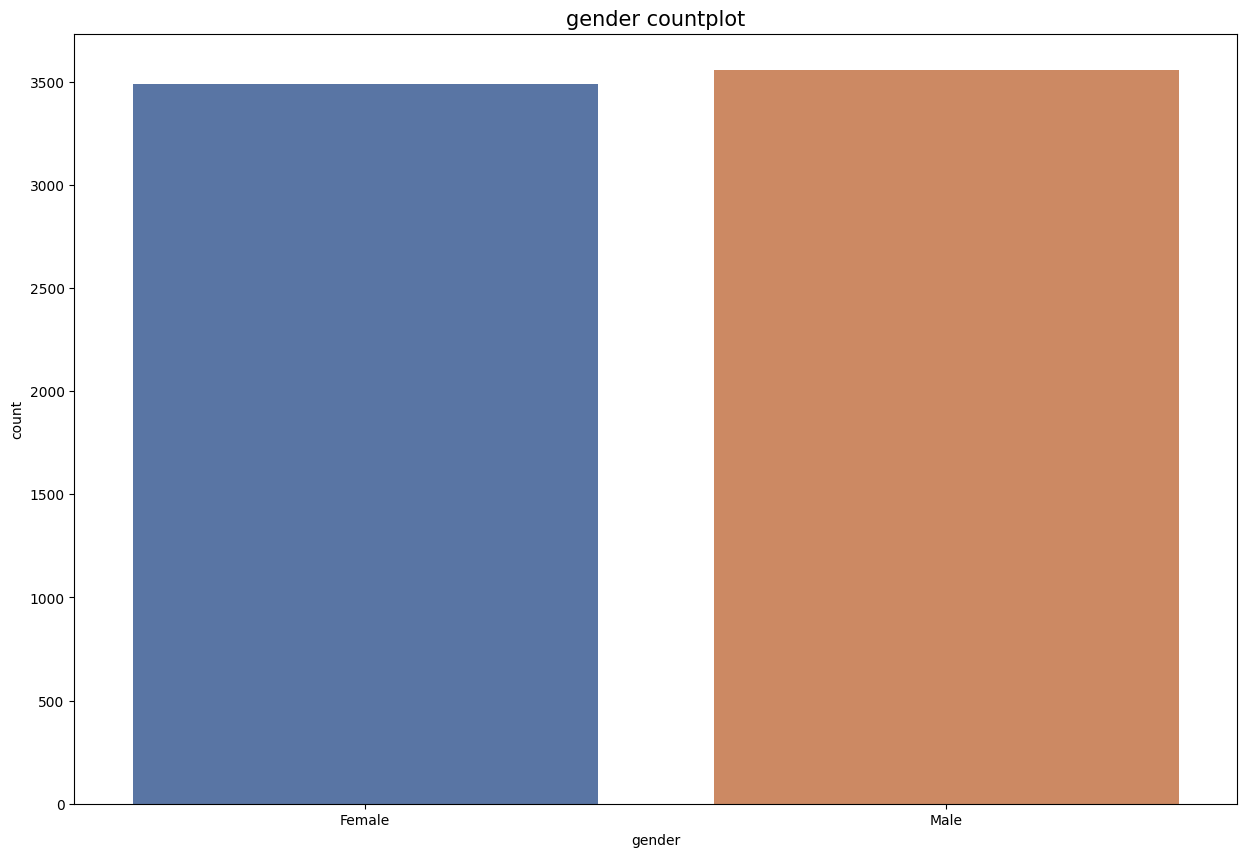

In [48]:
countplot_function(dataframe=df, column = 'gender', palette = 'deep' )
plt.show()

# Observation
There are almost equal number of male and female in our data. However, there is a few more men but it can be ignored. Therefore, it can be used to understand their overall behavior

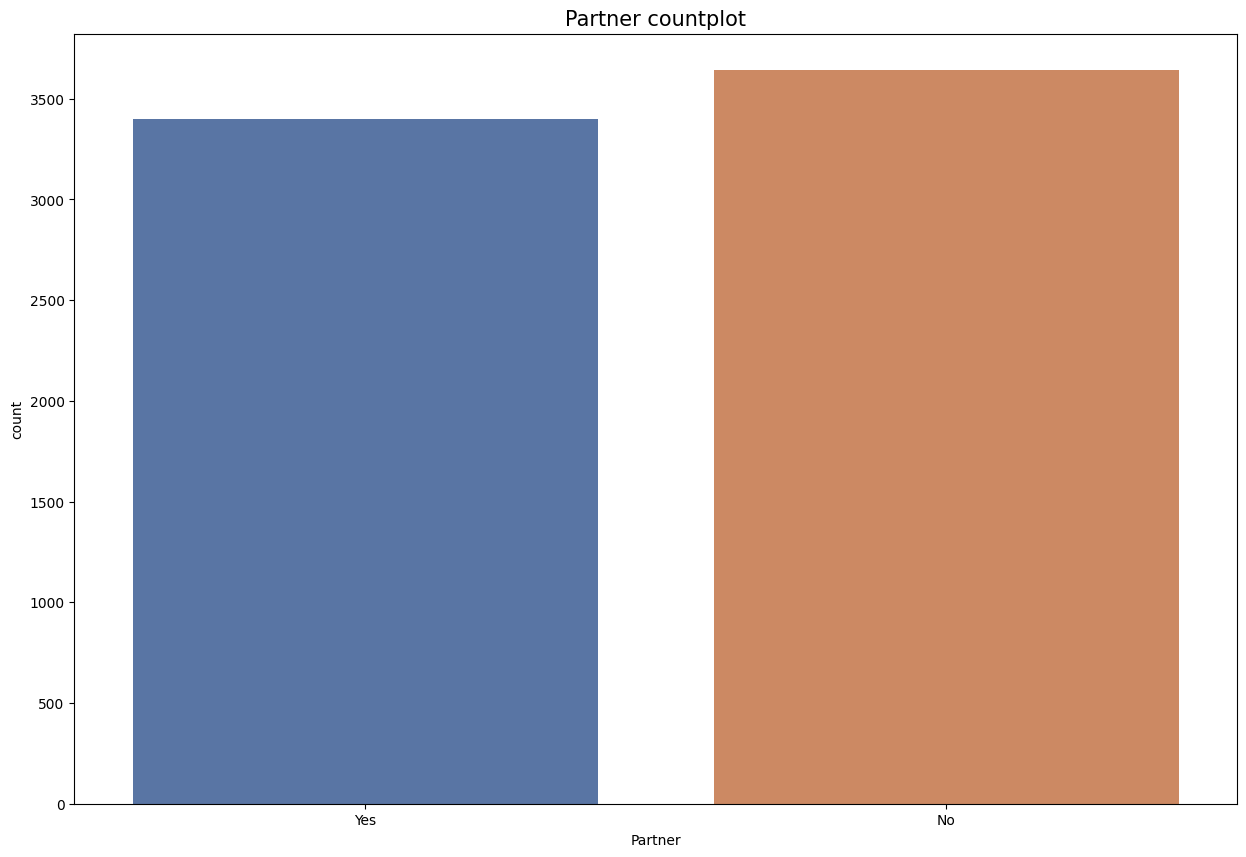

In [55]:
countplot_function(dataframe = df, column = "Partner", palette = 'deep')
plt.show()

# Observation
1.   There are more number of people who do not have partners compared to the ones who have partners.
2.   Since data for people who do not have partners are relatively more we would be able to predict their behavior and determine if they would leave the telco service or not.

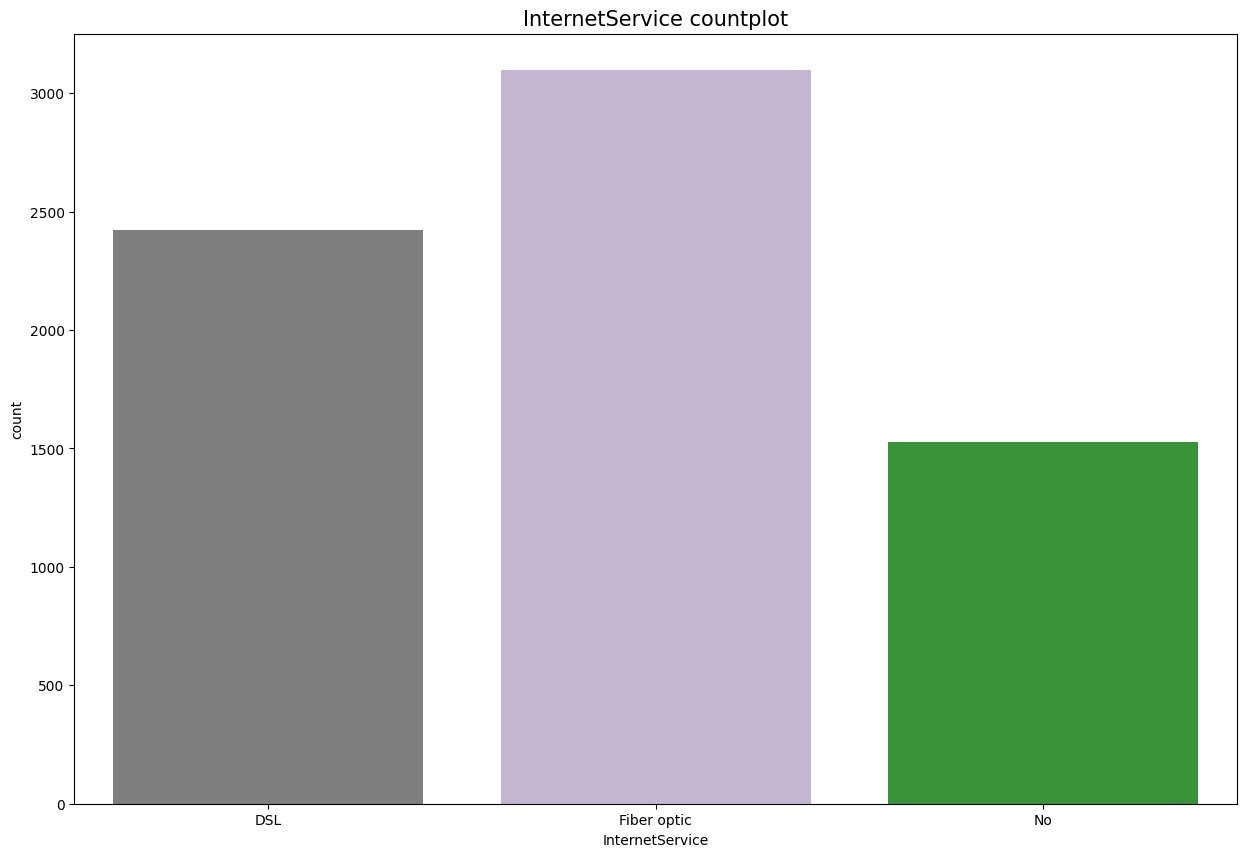

In [57]:
countplot_function(dataframe = df, column = "InternetService", palette = 'tab20_r')
plt.show()

# Observation
1.   As fiber optic service is becoming popular among customers, you can see that most used internet service is fiber optic.
2.   Most people opt for fiber optic services compared to DSL service

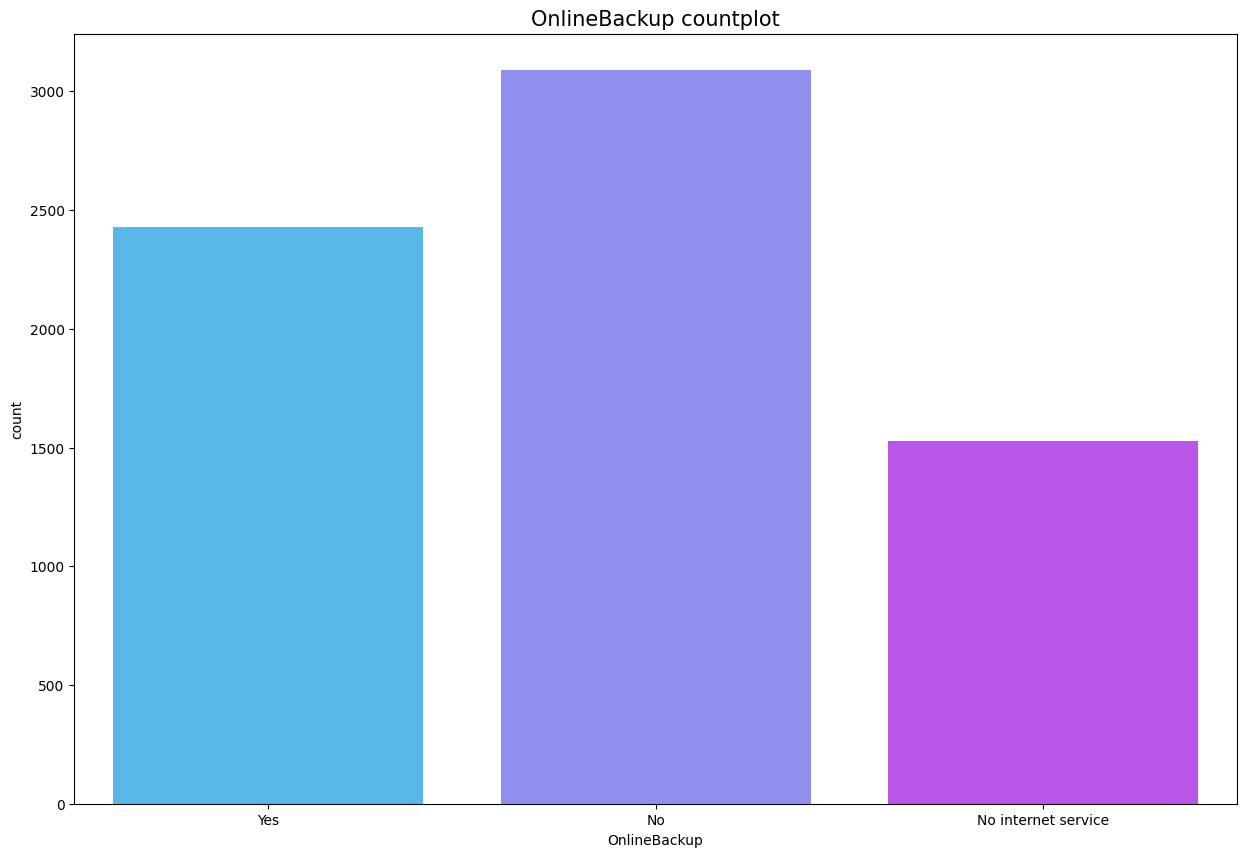

In [61]:
countplot_function(dataframe = df, column = "OnlineBackup", palette = 'cool')
plt.show()

# Observation
1.   as the plot presents, you can deduce that most people do not prefer online backup
2. there are a number of people who prefer no internet service as well
3. before considering whether the person prefers online back up we should check whether they already have an internet service

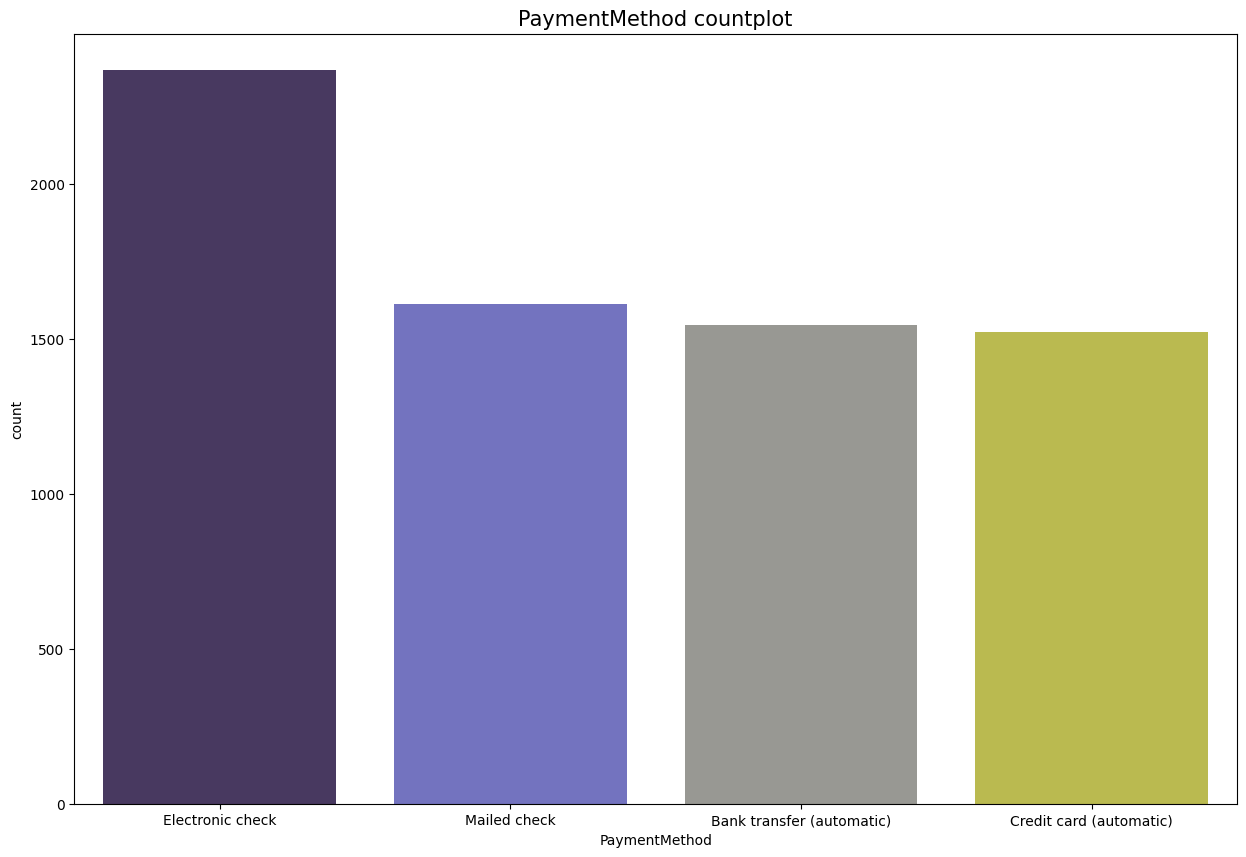

In [64]:
countplot_function(dataframe = df, column = "PaymentMethod", palette = 'gist_stern')
plt.show()

# Observation
1.  mailed check, bank transfer(automatic), credit card(automatic) seem to be used among customer. However a large number of people prefer electronic checks
2. It is possible to predict the behavior of the customers who use electronic check rather then others

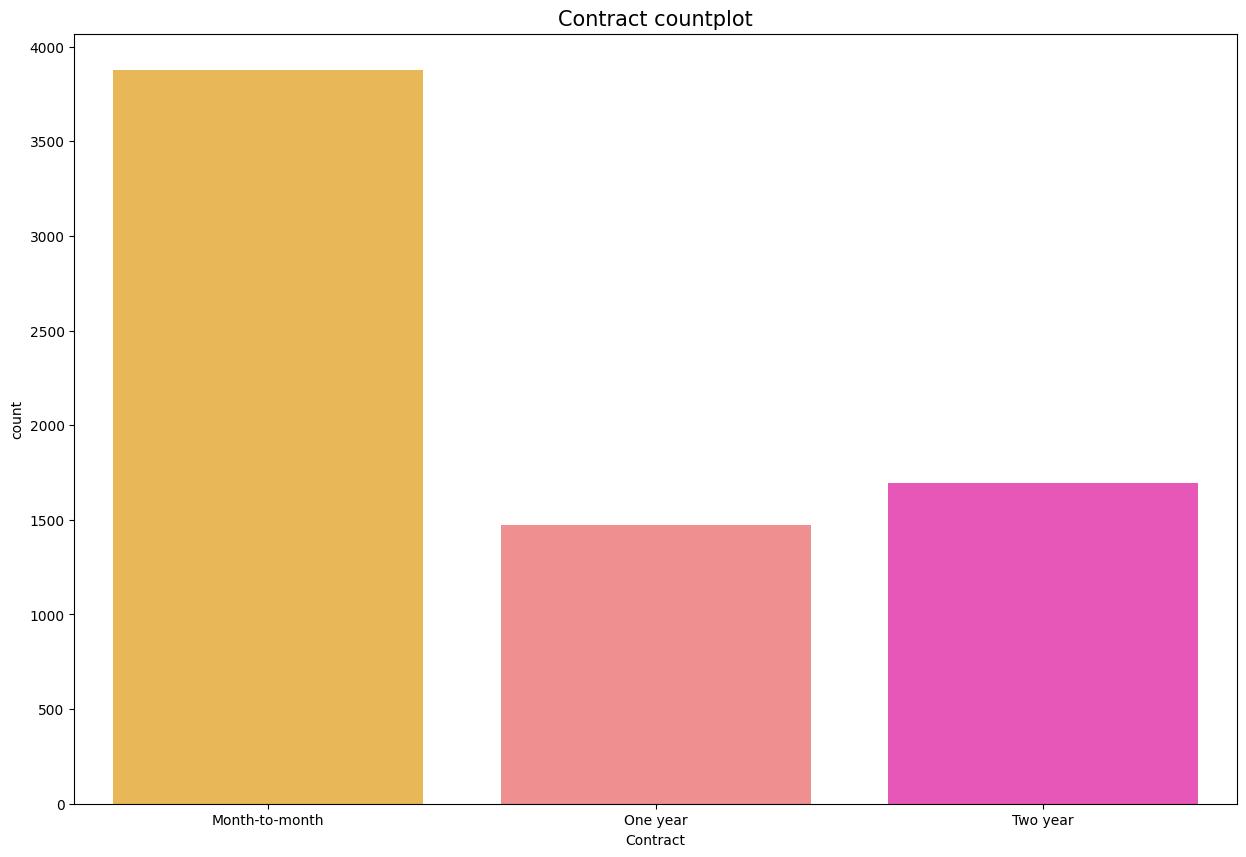

In [66]:
countplot_function(dataframe = df, column = "Contract", palette = 'spring_r')
plt.show()

# Observation
month-to-month contract is significantly more. which is also a reflection of real world scenerio, since most people prefer month-to-month


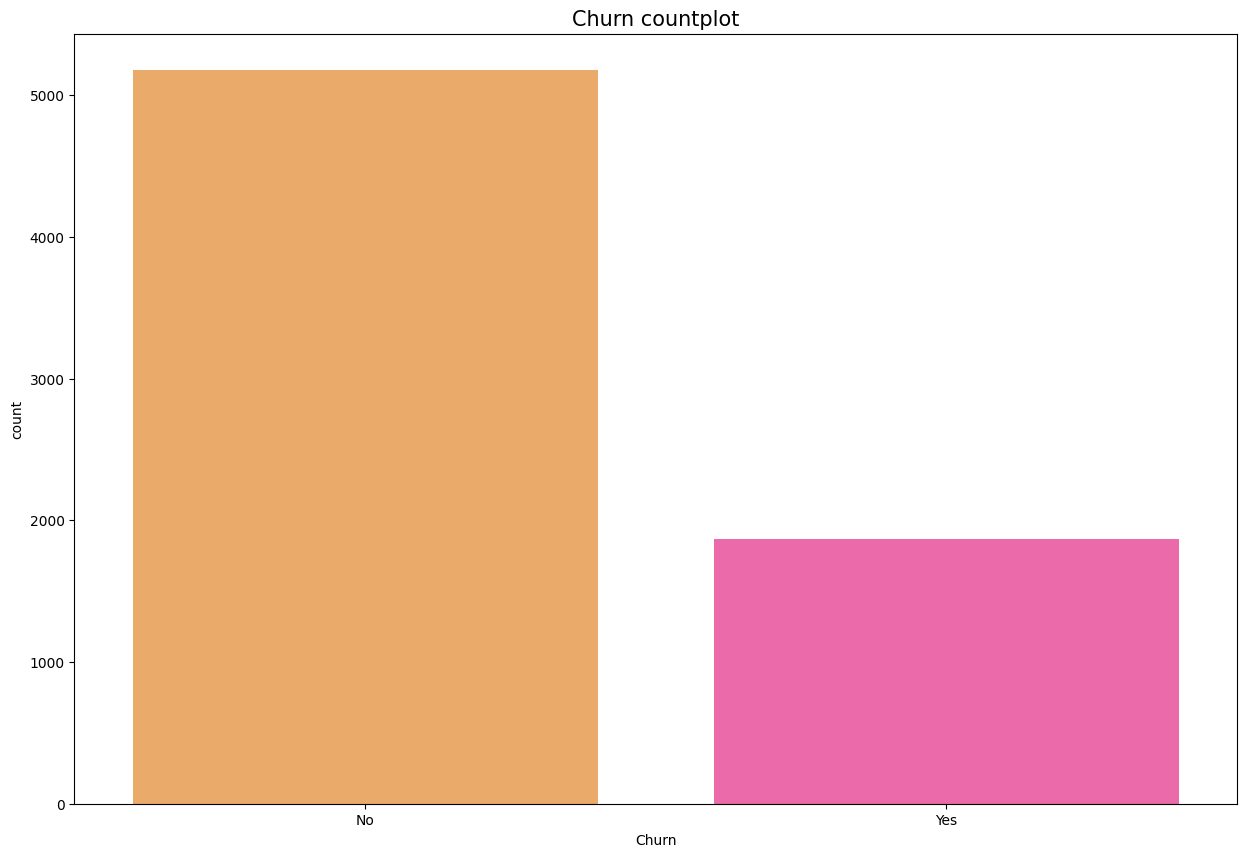

In [67]:
countplot_function(dataframe = df, column = "Churn", palette = 'spring_r')
plt.show()

# Observation


1.   We can see the number of people who have decided to leave after a certian period of time,A significantly large number of people did not leave the service
2.   With 71.4% customer retention, the service demonstrates
reasonable loyalty, though nearly 1 in 3 customers
discontinue service within the observed period.



In [68]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
def boxplot_function(dataframe, x_value, y_value, title_size=15, label_size=10,
                     figsize=(15, 10), palette='Set2'):

    plt.figure(figsize=(figsize))
    sns.boxplot(x=x_value, y=y_value, data=dataframe, palette=palette)
    plt.xlabel("{} Value".format(x_value), fontsize=label_size)
    plt.ylabel("{} Value".format(y_value), fontsize=label_size)
    plt.title("{} Vs. {} Boxplot".format(x_value, y_value), fontsize=title_size)
    plt.show()

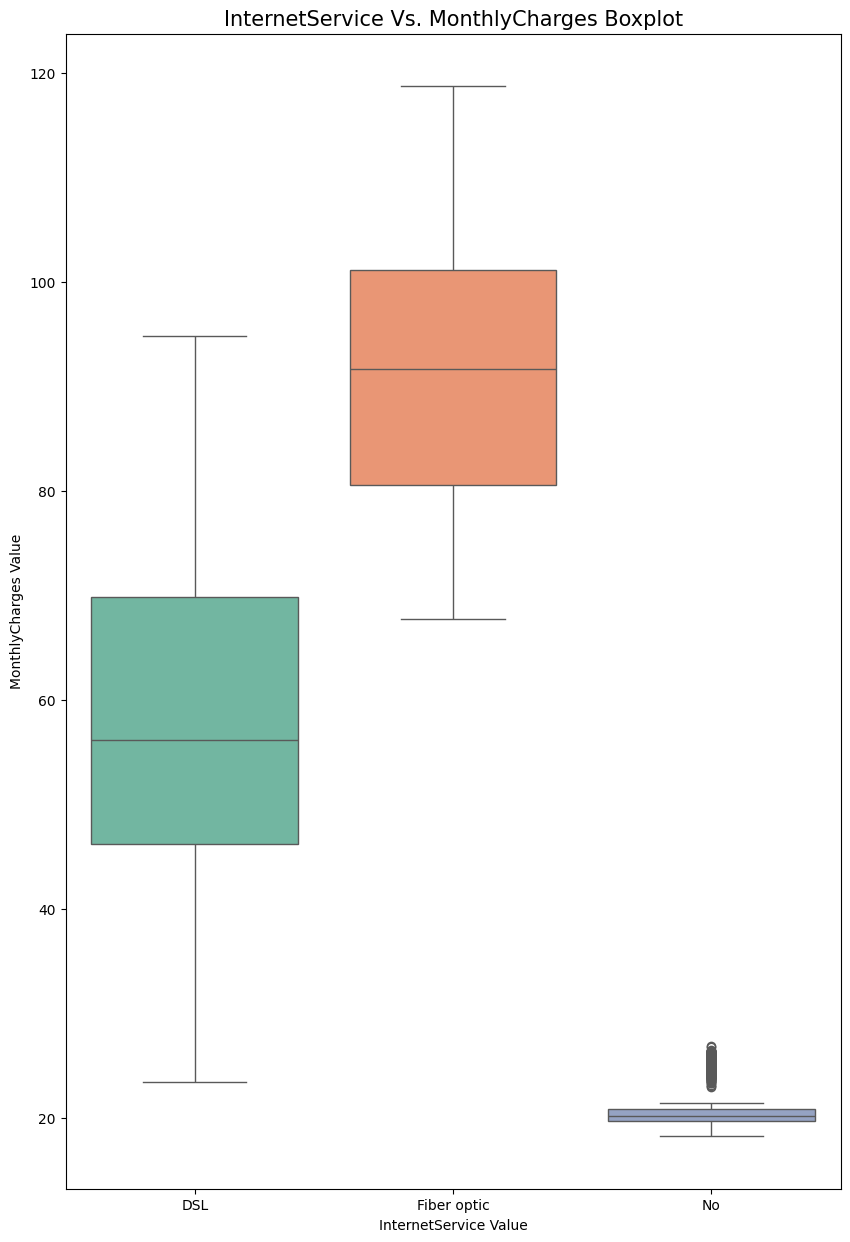

In [77]:
boxplot_function(dataframe=df, x_value = "InternetService", y_value="MonthlyCharges")

# Observation


People using 'fiber optic' have higher monthly charges, likewise people who use DSL or don't enroll in internet service have lower monthly charges.



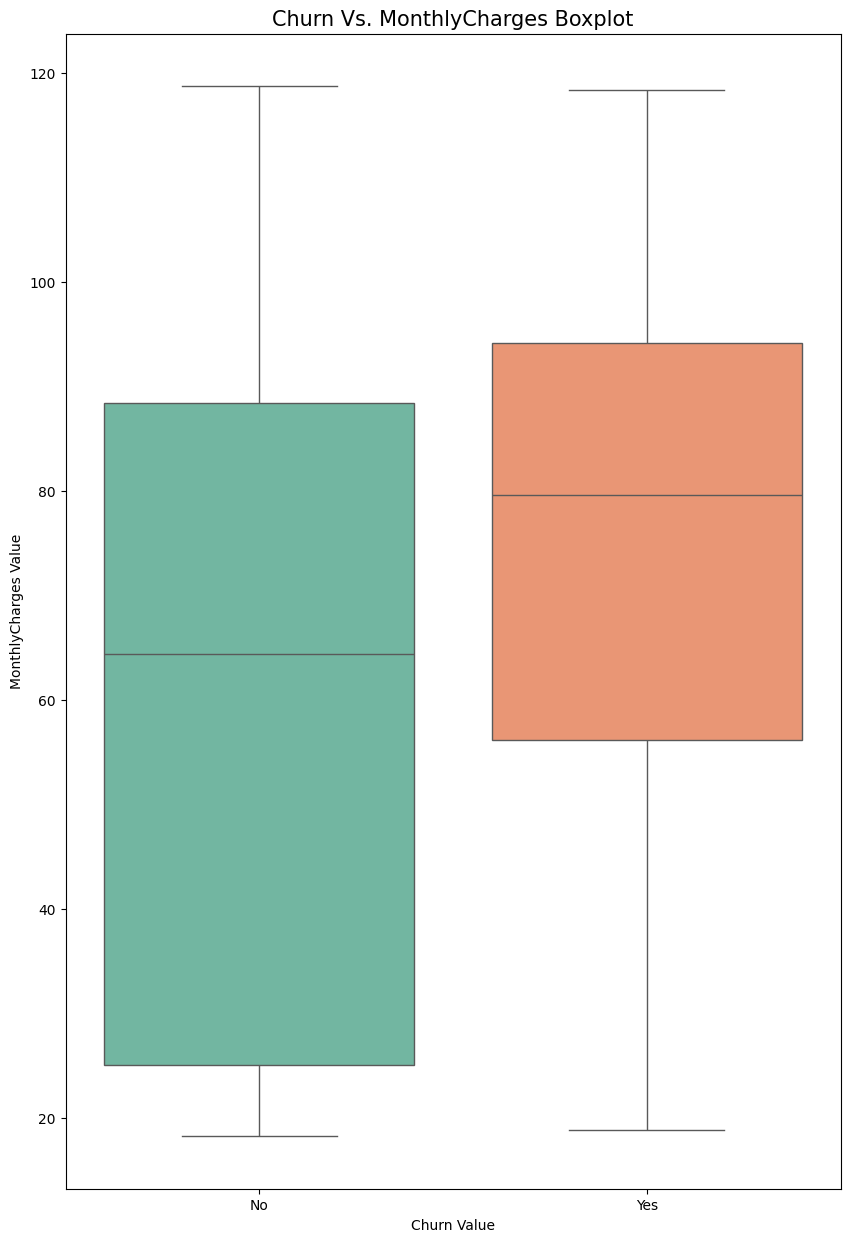

In [78]:
boxplot_function(dataframe=df, x_value = "Churn", y_value="MonthlyCharges")

# Observation

when the monthly charges are low less people leave the service.However, As the monthly charges are increasing, you can see that there is a higher chance of them leaving the service.




In [81]:
#there are missing values in total charges column,
#the table is in string format therefore is undetectable in the missing no plot
#convert to numeric
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', '1394.55'))

#boxplot_function(dataframe=df, x_value = "SeniorCitizen", y_value="TotalCharges")

# Observation

Senior citizens have a higher income,suggesting that they probablly opt for more service charges with higher total charges